In [1]:
# Alternative Answer 1

import pandas as pd
import numpy as np

df = pd.read_csv("test.csv", sep=",")

pos_dpi_cols = ["pos_iso_1_dpi", "pos_iso_2_dpi"]
neg_dpi_cols = ["neg_iso_1_dpi", "neg_iso_2_dpi"]

# absolute dpis
df["pos_sum"] = df[pos_dpi_cols].abs().sum(axis=1, skipna=True)
df["neg_sum"] = df[neg_dpi_cols].abs().sum(axis=1, skipna=True)

# expexted DPI
df["total_expected_dpi"] = 2 * df["dpi"]

# other isoform usage in dpi
df["Dpi_3"] = df["total_expected_dpi"] - (df["pos_sum"] + df["neg_sum"])

# dpi ≥10 
output = df[df["Dpi_3"] >= 10][["gid", "p_val", "Dpi_3", "gname"]]

output.to_csv("third_iso.csv", index=False)


In [ ]:
# Alternative Answer 2

import pandas as pd

# 1) Dosyayı oku
df = pd.read_csv("test.csv")

# 2) DPI kolonlarını tek tek listele
dpi_columns = [
    "pos_iso_1_dpi",
    "pos_iso_2_dpi",
    "neg_iso_1_dpi",
    "neg_iso_2_dpi"
]

# 3) Bu kolonların mutlak değerlerinin toplamını hesapla
dpi_sum = df[dpi_columns].abs().sum(axis=1)

# 4) Dpi_3 hesabı
df["Dpi_3"] = 2 * df["dpi"] - dpi_sum

# 5) Dpi_3 ≥ 10 olanları seç
filtered_df = df[df["Dpi_3"] >= 10]

# 6) Sadece gerekli kolonları al
result = filtered_df[["gid", "p_val", "Dpi_3", "gname"]]

# 7) CSV olarak kaydet
result.to_csv("third_iso.csv", index=False)


In [ ]:
# Alternative Answer 3 

import pandas as pd

dpi_cols = [
    "pos_iso_1_dpi", "pos_iso_2_dpi",
    "neg_iso_1_dpi", "neg_iso_2_dpi"
]

output = (
    pd.read_csv("test.csv")
      .assign(Dpi_3=lambda d: 2 * d["dpi"] - d[dpi_cols].abs().sum(axis=1))
      .query("Dpi_3 >= 10")
      [["gid", "p_val", "Dpi_3", "gname"]]
)

output.to_csv("third_iso.csv", index=False)


In [2]:
df[pos_dpi_cols]

,pos_iso_1_dpi,pos_iso_2_dpi
0,36.132447,NaN
1,9.684967,2.208281
2,11.390586,8.825009
3,15.938828,9.865629
4,17.154844,0.587337
...,...,...
523,50.649349,NaN
524,27.777779,NaN
525,13.511284,NaN
526,18.742218,NaN


In [5]:
df["pos_sum"]

0      36.132447
1      11.893248
2      20.215595
3      25.804457
4      17.742182
         ...    
523    50.649349
524    27.777779
525    13.511284
526    18.742218
527    11.582508
Name: pos_sum, Length: 528, dtype: float64

In [3]:
# this is just to display saved images
from IPython.display import display, Image
%matplotlib inline
import swan_vis as swan

# code to download this data is in the Getting started tutorial
sg = swan.read('data/swan.p')


/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import ann

Read in graph from data/swan.p


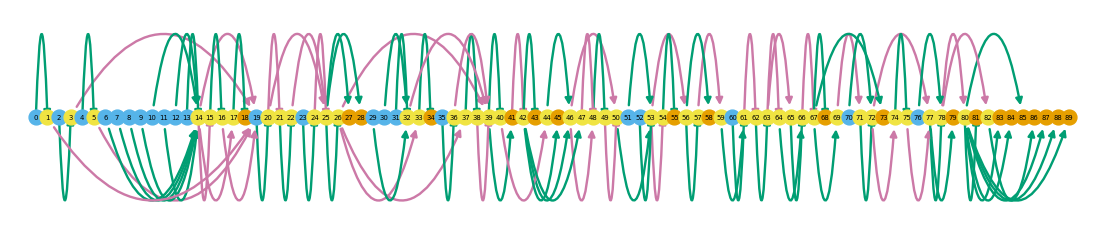

In [4]:
# plot a gene summary graph for the given gene
sg.plot_graph('CALD1')


In [5]:
# generate a report for the given gene
# save it with the given filepath prefix
# plot the percent isoform (pi) values
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript
# display novel splice sites and junctions
#     as outlined nodes and dashed edges respectively
sg = swan.read('data/swan.p')
sg.gen_report('CALD1',
              prefix='figures/nipal3',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True,
              indicate_novel=True)


Read in graph from data/swan.p

Plotting transcripts for ENSG00000122786
Saving transcript path graph for ENST00000361901.6 as figures/nipal3_novel_ENST00000361901.6_path.png
Saving transcript path graph for TALONT000447493 as figures/nipal3_novel_TALONT000447493_path.png
Saving transcript path graph for ENST00000480638.1 as figures/nipal3_novel_ENST00000480638.1_path.png
Saving transcript path graph for ENST00000424922.5 as figures/nipal3_novel_ENST00000424922.5_path.png
Saving transcript path graph for ENST00000475772.5 as figures/nipal3_novel_ENST00000475772.5_path.png
Saving transcript path graph for ENST00000496024.1 as figures/nipal3_novel_ENST00000496024.1_path.png
Saving transcript path graph for ENST00000466704.1 as figures/nipal3_novel_ENST00000466704.1_path.png
Generating report for ENSG00000122786


/Users/melike/anaconda3/lib/python3.11/site-packages/swan_vis/swangraph.py:3062: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  for ind, entry in t_df.iterrows():


In [13]:
gtf_file = "gencode.v29.annotation.gtf"
gene = "PLPP5"

isoforms = get_isoforms_from_gencode(gtf_file, gene)

print(f"{gene} genine ait isoformlar ({len(isoforms)} adet):")
for iso in isoforms:
    print(iso)


PLPP5 genine ait isoformlar (15 adet):
ENST00000419686.2
ENST00000422581.6
ENST00000424479.6
ENST00000524409.1
ENST00000524616.5
ENST00000527758.1
ENST00000527793.1
ENST00000528814.1
ENST00000529359.5
ENST00000530193.5
ENST00000530432.1
ENST00000531109.5
ENST00000531483.1
ENST00000531823.5
ENST00000534339.5
